# RANDOM FOREST CLASSIFIER #

## INITIAL CONFIGURATION ##

In [36]:
import os
import numpy as np
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from functions_rf import *


In [8]:
file_path = (os.path.dirname(os.getcwd()) + '/data/')
data = pd.read_csv(file_path + '/Bank_Customer_Churn_Prediction.csv')

# DATA PREPROCESSING #

In [10]:
data.drop(columns="customer_id",axis=1,inplace=True)
data['country'] = data['country'].map({'France': 0, 'Spain' : 1,'Germany':2})
data['gender'] = data['gender'].map({'Male': 0, 'Female' : 1})
data['balance'] = data['balance'].astype('int64')
data['estimated_salary'] = data['estimated_salary'].astype('int64')
data.to_csv(file_path+'preprocessed_data.csv')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   credit_score      10000 non-null  int64
 1   country           10000 non-null  int64
 2   gender            10000 non-null  int64
 3   age               10000 non-null  int64
 4   tenure            10000 non-null  int64
 5   balance           10000 non-null  int64
 6   products_number   10000 non-null  int64
 7   credit_card       10000 non-null  int64
 8   active_member     10000 non-null  int64
 9   estimated_salary  10000 non-null  int64
 10  churn             10000 non-null  int64
dtypes: int64(11)
memory usage: 859.5 KB


In [14]:
data.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
y = data['churn']
X = data.drop(columns='churn', axis = 1)

In [17]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,42,2,0,1,1,1,101348
1,608,1,1,41,1,83807,1,0,1,112542
2,502,0,1,42,8,159660,3,1,0,113931
3,699,0,1,39,1,0,2,0,0,93826
4,850,1,1,43,2,125510,1,1,1,79084


In [18]:
np.random.seed(0)
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 7963), (1, 7963)]


C:\Users\Teresa\AppData\Local\Temp\ipykernel_22132\2992105325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=dataframe,alpha=0.8,palette='pastel')


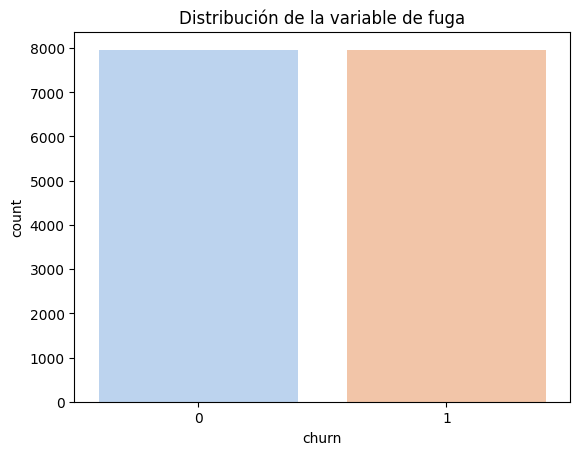

In [19]:
dataframe = pd.DataFrame(y_resampled)
sns.countplot(x='churn', data=dataframe,alpha=0.8,palette='pastel')
plt.title('Distribución de la variable de fuga')
plt.show()

In [20]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
np.random.seed(0)
sc= StandardScaler()
X_train_rescaled = sc.fit_transform(X_train)
X_test_rescaled = sc.transform(X_test)

In [22]:
print(X_train_rescaled.mean())
print(X_test_rescaled.mean())
print(X_train_rescaled.std())
print(X_test_rescaled.std())

-2.3870666476085e-17
0.01429811034464932
1.0
1.0083331886545412


# MODEL #

### Fine-tuning ###

In [28]:
"""np.random.seed(0)
### Hyper-parameter tuning with Grid Search method.
param_grid = {'n_estimators' : [50, 100, 150, 200],
              'max_depth' : [None, 5, 10],
              'min_samples_leaf': [1, 2, 4]
            }

cv = KFold(n_splits=10, random_state=42, shuffle=True)
clf_model = GridSearchCV(RandomForestClassifier(criterion='gini',random_state=42),param_grid,cv=cv, n_jobs=4, verbose=1)
clf_model = clf_model.fit(X_train_rescaled,y_train)

print ('Acuracy for RandomForest with BEST n_estimators is: {0}, max_depth is : {1}, min_samples_leaf is: {2}. The success rate is: {3}:'.format(
    clf_model.best_params_['n_estimators'], clf_model.best_params_['max_depth'], clf_model.best_params_['min_samples_leaf'],clf_model.best_score_))
"""

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Acuracy for RandomForest with BEST n_estimators is: 200, max_depth is : None, min_samples_leaf is: 1. The success rate is: 0.8454474097331242:


In [29]:
np.random.seed(0)
#cross-validation
cv = KFold(n_splits=10, random_state=None, shuffle=True)
train_scores = cross_validate(RandomForestClassifier(n_estimators=200,criterion='gini',random_state=42), X_train_rescaled, y_train,cv=cv, scoring=('accuracy', 'precision','recall','f1'),
                        return_train_score=True)

mean_accuracy = train_scores['test_accuracy'].mean()
mean_precision = train_scores['test_precision'].mean()
mean_recall = train_scores['test_recall'].mean()
mean_f1 = train_scores['test_f1'].mean()

print('Mean accuracy:', mean_accuracy)
print('Mean precision:', mean_precision)
print('Mean recall:', mean_recall)
print('Mean F1 score:', mean_f1)

Mean accuracy: 0.8452904238618524
Mean precision: 0.846898727318836
Mean recall: 0.8454759443646166
Mean F1 score: 0.8460360824854607


In [44]:
np.random.seed(0)
model_rf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)
model_rf.fit(X_train_rescaled,y_train)
y_pred_test = model_rf.predict(X_test_rescaled)
y_pred_train = model_rf.predict(X_train_rescaled)

In [45]:
np.random.seed(0)
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_pred_test, labels=model_rf.classes_)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1397  236]
 [ 217 1336]]


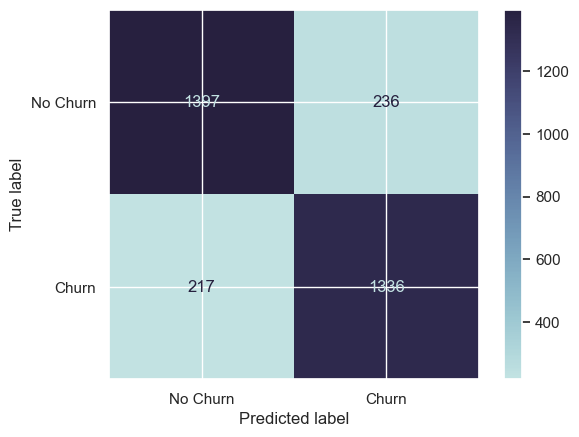

In [49]:
np.random.seed(0)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

In [52]:
np.random.seed(0)
print('Testing Metrics:')
print(f'Testing Accuracy: ', accuracy_score(y_test, y_pred_test)) 
print(f'Testing Precision: ',precision_score(y_test, y_pred_test))
print(f'Testing Recall: ',recall_score(y_test, y_pred_test))
print(f'Testing F1-Score: ',f1_score(y_test, y_pred_test))

Testing Metrics:
Testing Accuracy:  0.8578154425612052
Testing Precision:  0.8498727735368957
Testing Recall:  0.8602704443013522
Testing F1-Score:  0.85504


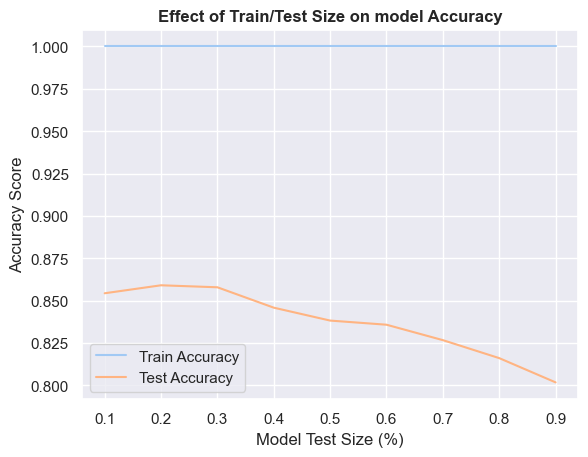

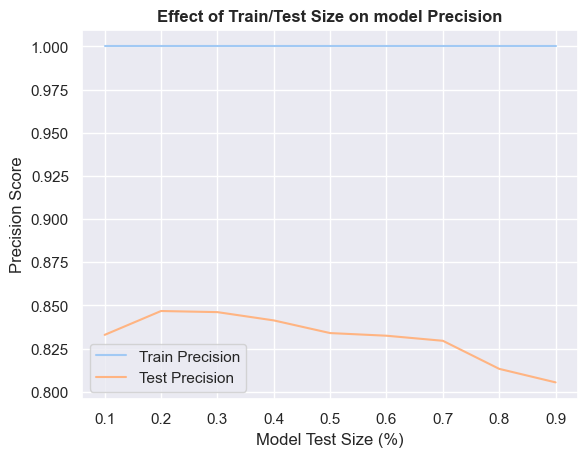

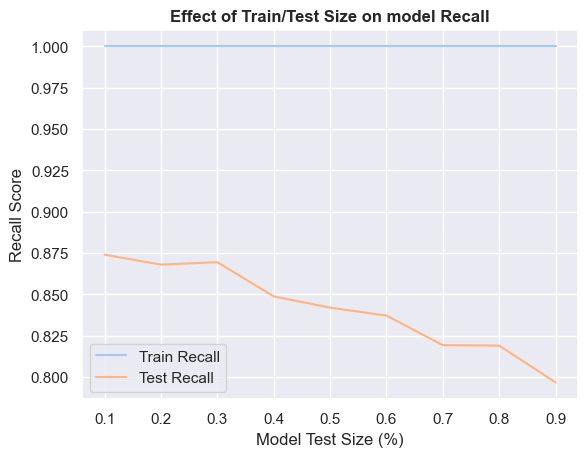

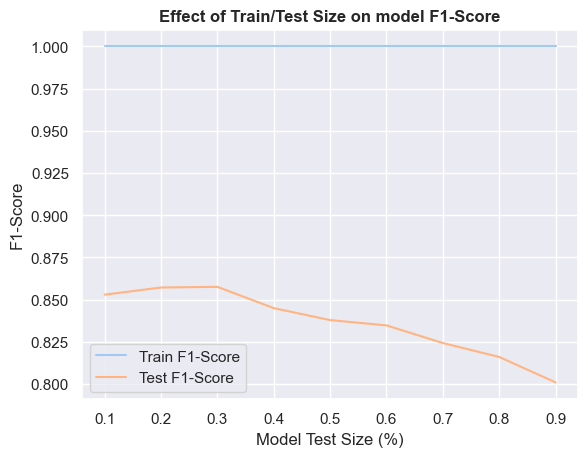

In [48]:
print_metric_plots(X_resampled,y_resampled)

c:\TFG\TFG_ADE\modelos\functions_rf.py:137: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',color='#aaa')


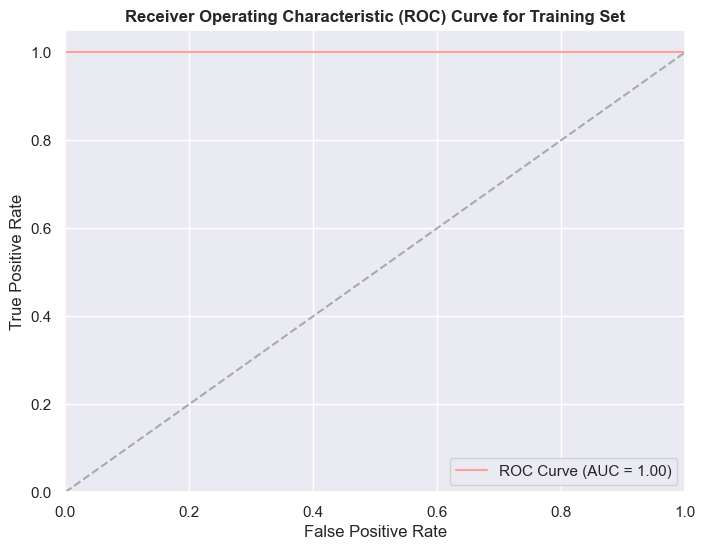

c:\TFG\TFG_ADE\modelos\functions_rf.py:153: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'k--',color='#aaa')


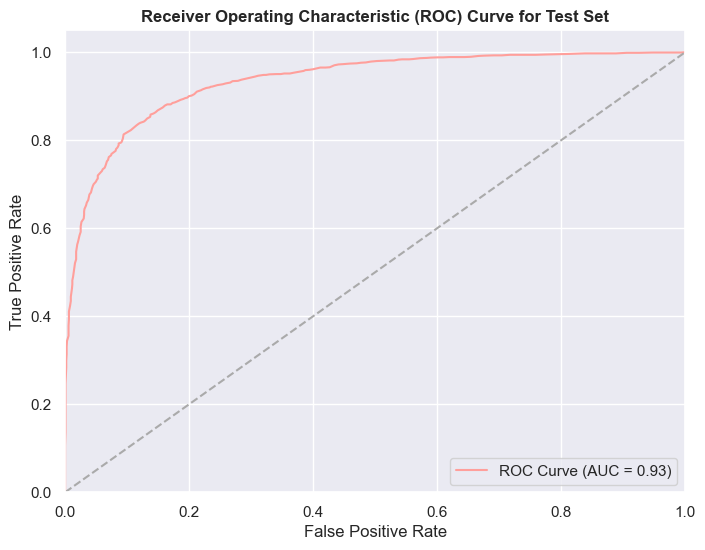

In [43]:
roc(X_resampled, y_resampled)